## Driven-dissipative Ultrastrong Coupling QED Dynamics of Many Two-Level Systems
We consider the Hamiltonian of an ensemble of two-level systems (TLSs) 
\begin{eqnarray}
H_\text{sys} &=& \sum_{n=1}^N w_q \frac{1}{2}\sigma_{z,n} + w_\text{cav}a^\dagger a +\lambda \sigma_{x,n}\left(a+a^\dagger\right)
\end{eqnarray}
with an arbitrary value of $\lambda>0$, including $\lambda>0.1$, i.e. the light-matter interaction can be in the ultrastrong coupling (USC) regime. 
The eigenstes of $H_\text{sys}$ in the USC regime are light-matter dressed states. 
A more general open quantum dynamics can be considered by introducing incoherent driving and dissipation. 
The form of the corresponding master equation depends on the regime the system is in. 

In the weak and strong coupling regime, the dynamics is given by 
\begin{eqnarray}
\dot{\rho} &=& -\frac{i}{\hbar} \lbrack H_\text{sys}, \rho\rbrack + \sum_{n=1}^N \left(\gamma_\text{E}\mathcal{L}_{\sigma_{-,n}}[\rho]
+\gamma_\text{D}\mathcal{L}_{\sigma_{z,n}/2}[\rho]
+\gamma_\text{P}\mathcal{L}_{\sigma_{+,n}}[\rho]\right)
+ \kappa\mathcal{L}_{a}[\rho] + w\mathcal{L}_{a^\dagger}[\rho],
\end{eqnarray}
where the term in $\gamma_\text{E}$ gives local emission, $\gamma_\text{D}$ dephasing, $\gamma_\text{P}$ incoherent (spin) pumping, and the photonic losses and pumping terms are proportional to $\kappa$ and $w$, respectively. $\mathcal{L}_{X}(\rho)=X\rho X^\dagger -\frac{1}{2}X^\dagger X\rho -\frac{1}{2}\rho X^\dagger X$.


In the USC regime, the above equation leads to unphysical results. The eigenvectors forming the jump operators of the Lindbladian superoperators must be constructed themselves using the eigenvectors $|j\rangle$ of the full light-matter Hamiltonian $H_\text{sys}$.
We thus consider the following USC master equation (ME) for $N=1$ TLS,
\begin{eqnarray}
\dot{\rho} &=& -\frac{i}{\hbar} \lbrack H_\text{sys}, \rho\rbrack + \text{Lindbladians in the USC regime}.
\end{eqnarray}

One way of rewriting the master equation in the USC is given in Ref. [2] and reads (for $gamma_\text{P}=0$)

\begin{eqnarray}
\dot{\rho} &=& -\frac{i}{\hbar} \lbrack H'_\text{sys}, \rho\rbrack 
+\mathcal{L}_{X_\phi}[\rho] 
+\sum_{j,k\neq j}\Gamma_\phi^{jk}\mathcal{L}_{|j\rangle\langle k|}[\rho]
+\sum_{j,k> j}\left(\Gamma_\kappa^{jk}+\Gamma_\gamma^{jk}\right)\mathcal{L}_{|j\rangle\langle k|}[\rho]
\end{eqnarray}
where $H'_\text{sys}$ includes the Lamb shift. The terms relative to dephasing are those in $X_\phi$ and $\Gamma_\phi^{jk}$. There $X_\phi = \sum_j \Phi^j |j\rangle\langle j|$.

The terms relative to incoherent emission and photonic emission are those in $\Gamma_\kappa^{jk}$ and $\Gamma_\gamma^{jk}$, respectively.  

We have that the rates for the dressed superoperators are 
\begin{eqnarray}
(\Phi^j)^2 &=& \frac{1}{2}\gamma_\phi(0)|\sigma_x^{jj}|^2\\
\Gamma_\phi^{jk} &=& \frac{1}{2}\gamma_\phi(\Delta_{kj})|\sigma_x^{jk}|^2\\
\Gamma_\gamma^{jk} &=& \gamma(\Delta_{kj})|\sigma_x^{jk}|^2\\
\Gamma_\kappa^{jk} &=& \kappa(\Delta_{kj})|X^{jk}|^2\\
\end{eqnarray}
with the results of the operators collapse from the undressed to the dressed basis given by 
\begin{eqnarray}
\sigma_\alpha^{jk}&= \langle j|\sigma_\alpha|k\rangle\\ 
X^{jk}&= \langle j|(a+a^\dagger)|k\rangle
\end{eqnarray}
with $\alpha = x,y,z$ and $\Delta_{kj}$ is the eigenstates energy difference. Here $\gamma_\phi(\omega)$, $\gamma(\omega)$ and $\kappa(\omega)$ are the rates corresponding to the spectral density of frequency $\omega$, although in the following we assume that the structure of the baths appearing in the spectral densities can be neglected. We also neglect the Lamb shift.

In the case in which $N$ TLSs are present, the Liouvillian space grows as $4^N\cdot n_\text{cav}^2$ where $n_\text{cav}$ is the cutoff of the number of photons in the photonic Hilbert space. 

Here we exploit permutational invariance of the spins [4] to reduce the size of the total Liouvillian in the USC regime from $4^N\cdot n_\text{cav}^2$ to only $N^4\cdot n_\text{cav}^2$. We avoid writing explicitly the local spin operators $\sigma_{\alpha,n}$ with $\alpha=\{x,y,z, +, -\}$ by projecting the USC Lindbladian onto the constructed permutational invariant Lindbladian superoperators in the undressed basis [5].


We will compare this reconstruction method to obtain the USC driven-dissipative time evolution. The results are obtained exploiting $\texttt{mesolve}$, QuTiP's master equation solver [6].

Notice that the description of the USC dynamics has been generalized in Ref. [3] to include non-Markovian effects. Also, the approach followed here might not be appropriate for harmonic Hamiltonians $H_\text{sys}$.

In [1]:
from time import clock
from qutip import *
from qutip.models.piqs import *
from qutip.models.piqs import Dicke as Piqs
from qutip import operator_to_vector as op2vec
import matplotlib.pyplot as plt
% matplotlib inline
from scipy import constants

## 1) Case $N=1$: Single TLS

### General parameters

In [59]:
# normal USC master equation
wq = 1.0     # Energy of the 2-level system.
n_tls = 1
Ncav = 3
lam = 0.2
wcav = 1
matrixsize = 2**n_tls * Ncav

#Spin Bath
# Bose-Einstein distribution determines the occupation number
frequency_hertz = 10**(13)
temperature_kelvin = 0.* 10**(2)
if temperature_kelvin != 0:
    x = (frequency_hertz / temperature_kelvin) * (constants.hbar / constants.Boltzmann)
    n0 = 1/(np.exp(x) -1)
else:
    n0 = 0.
print("T: ",temperature_kelvin, " n0: ",n0)
# set collective pumping and collective emission rates (coupled ensembles) 
g0 = 1
gamma0 = g0 * (1 + n0)
pump0 = g0 * n0

#Photon Bath
# Bose-Einstein distribution determines the occupation number
frequency_hertz_phot = 5*10**(13)
temperature_kelvin_phot = 0.*10**(2)
if temperature_kelvin_phot != 0:
    x_phot = (frequency_hertz_phot / temperature_kelvin_phot) * (constants.hbar / constants.Boltzmann)
    n0_phot = 1/(np.exp(x_phot) -1)
else:
    n0_phot = 0.
    
print("T phot: ",temperature_kelvin_phot, " n0 phot: ",n0_phot)
# set collective pumping and collective emission rates (coupled ensembles) 
g0_phot = 1
kappa0 = g0_phot * (1 + n0_phot)
photon_pump0 = g0_phot * n0_phot

# driven dissipative parameters (in the undressed basis)
gamma = gamma0 #local emission
dephasing = 0. #local dephasing
pump =  pump0 #local pumping
kappa = kappa0 #photon emission
photon_pump = photon_pump0 #photon pumping

# print to screen the undressed rates
print("gamma: ", gamma)
print("pump: ", pump)
print("dephasing: ", dephasing)
print("kappa: ", kappa)
print("photon_pump: ", photon_pump)

# place operators in tensor Hilbert space
sx = tensor(sigmax(),qeye(Ncav))
sm = tensor(destroy(2).dag(),qeye(Ncav))
sp = sm.dag()
sz = tensor(sigmaz(),qeye(Ncav))
a = tensor(qeye(2),destroy(Ncav))

# total light-matter Hamiltonian
Hsys = 0.5 * wq * sz + wcav*a.dag()*a +lam*sx *(a + a.dag())

# initial state
psi0_phot = basis(Ncav,0) #non-excited cavity (ground state)
psi0_tls = basis(2,1) #non-excited TLS (ground state)
psi0 = tensor(psi0_tls, psi0_phot)

# find eigenvalues and eigenstates
print("Calculating USC Hamiltonian spectrum...")
h_vals, h_vec = Hsys.eigenstates()
print("_Calculated USC Hamiltonian spectrum.")

# Options for the time-integration solvers
#tmax = 8000
tmax = 10
nt = 1000
tlist = np.linspace(0, tmax, nt)
options = Options(nsteps=15000, store_states=True, atol=1e-13, rtol=1e-13)

T:  0.0  n0:  0.0
T phot:  0.0  n0 phot:  0.0
gamma:  1.0
pump:  0.0
dephasing:  0.0
kappa:  1.0
photon_pump:  0.0
Calculating USC Hamiltonian spectrum...
_Calculated USC Hamiltonian spectrum.


### 1.a) Case $N=1$: Dressed basis, standard USC Liouvillian

In [60]:
# build the USC Lindbladian for N=1 with dressed collapse operators
c_ops = []
op_deph = []
clock_t0 = clock()

# two nested cycles to calculate the USC collapse operators besides for local dephasing
print("Calculating USC Lindbladian...")
for j in range(matrixsize):
    for k in range(j+1,matrixsize):
        # local emission (USC)
        if gamma != 0:
            rate = gamma*((sm).matrix_element(h_vec[j],h_vec[k]))**2
            if np.real(rate) > 0. :            
                c_ops.append(np.sqrt(rate) * h_vec[j]* h_vec[k].dag())
        # local pumping (USC)
        if pump != 0:
            rate = pump*((sp).matrix_element(h_vec[j],h_vec[k]))**2
            if np.real(rate) > 0. :            
                c_ops.append(np.sqrt(rate) * h_vec[k]* h_vec[j].dag())         
        # photon emission (USC)
        if kappa != 0:
            rate = kappa*((a).matrix_element(h_vec[j],h_vec[k]))**2
            if np.real(rate) > 0. :            
                c_ops.append(np.sqrt(rate) * h_vec[j]* h_vec[k].dag())
        # photon pump
        if photon_pump != 0:
            rate = photon_pump*((a.dag()).matrix_element(h_vec[j],h_vec[k]))**2
            if np.real(rate) > 0. :            
                c_ops.append(np.sqrt(rate) * h_vec[k]* h_vec[j].dag())
                
# calculate the local dephasing (USC) as a Lindbladian plus collapse operators
if dephasing != 0:
    print("Calculating dephasing USC Lindbladian...")
    # First part of the dephasing Lindbladian (sum of diagonal terms)
    ops_dephasing = []
    for j in range(matrixsize):
        rate = np.sqrt(dephasing/2.)*((sz).matrix_element(h_vec[j],h_vec[j]))
        if np.real(rate) > 0. :            
            ops_dephasing.append(rate*h_vec[j]*h_vec[j].dag())
    ops_dephasing = np.sum(ops_dephasing)
    c_ops.append(ops_dephasing)
    # Second part of the dephasing Lindbladian (non-diagonal terms)
    for j in range(matrixsize):
        for k in range(matrixsize):
            if k != j:
                rate = dephasing*((sz/2.).matrix_element(h_vec[j],h_vec[k]))**2
                if np.real(rate) > 0. :            
                    c_ops.append(np.sqrt(rate)*h_vec[j]*h_vec[k].dag())                         
    print("_Calculated dephasing USC Lindbladian.")
print("Calculated USC Lindbladian.")
clock_tf = clock()
dt_clock = clock_tf - clock_t0
print("time: ",dt_clock)
L_usc = liouvillian(Hsys,c_ops)

Calculating USC Lindbladian...
Calculated USC Lindbladian.
time:  0.005338000000000065


In [61]:
# Solver
output = mesolve(Hsys, psi0, tlist, c_ops, [sz, sm.dag(), a.dag()*a], options=options)
szt = output.expect[0]
spt = output.expect[1]
nphott = output.expect[2]

# Solver
output_ = mesolve(L_usc, psi0, tlist, [], [sz, sm.dag(),a.dag()*a], options=options)
szt_ = output_.expect[0]
spt_ = output_.expect[1]
nphott_ = output_.expect[2]

### 1.b) Case $N=1$: Undressed basis, non-USC Liouvillian

In [62]:
# calculate the undressed collapse operators
c_ops_undressed = []
c_ops_undressed.append(np.sqrt(gamma)*sm)
c_ops_undressed.append(np.sqrt(pump)*sp)
c_ops_undressed.append(np.sqrt(dephasing)*sz)
c_ops_undressed.append(np.sqrt(kappa)*a)
c_ops_undressed.append(np.sqrt(photon_pump)*a.dag())

# build the total undressed Liouvillian
Ltot = liouvillian(Hsys, c_ops_undressed)
# build the single undressed Liouvillians for the reconstruction of the USC one
Lgamma = liouvillian(0.*Hsys, [np.sqrt(gamma)*sm])
Lpump = liouvillian(0.*Hsys, [np.sqrt(pump)*sp])
Ldeph = liouvillian(0.*Hsys, [np.sqrt(dephasing)*sz]) 
Lkappa = liouvillian(0.*Hsys, [np.sqrt(kappa)*a])
Lphoton_pump = liouvillian(0.*Hsys, [np.sqrt(photon_pump)*a.dag()])


undressed_steady = steadystate(Ltot)
undressed_steady_energy = expect(sz, undressed_steady)
undressed_steady_energy_phot = expect(a.dag()*a, undressed_steady)
# find the local operator solution 
output2 = mesolve(Ltot, psi0, tlist, [], [sz, sm.dag(),a.dag()*a], options=options)
szt2 = output2.expect[0]
spt2 = output2.expect[1]
nphott2 = output2.expect[2]


### 1.c) Case $N=1$: Dressed basis,  USC Liouvillian reconstructed from the non-USC Liouvillian

In [114]:
## Form a set of projectors into all eigenstates 
# We assume we have a lindblad for c_ops_undressed = [sigma_-, sigma_+, sigma_z, a, a.dag()]
# We project out terms which do not conserve energy

c_ops_true = []

print("_Calculating reconstructed USC Lindbladian...")
for j in range(matrixsize):
    for k in range(j+1, matrixsize):
        vec_rho_jj = op2vec(h_vec[j] * h_vec[j].dag())
        vec_rho_kk = op2vec(h_vec[k] * h_vec[k].dag())
        if gamma != 0:
            # local emission (reconstructed USC)
            overlap_coll = (vec_rho_jj.dag() * Lgamma * vec_rho_kk).data[0,0]
            c_ops_true.append(np.sqrt(overlap_coll) * h_vec[j] * h_vec[k].dag())
        if pump != 0:
            # local pump (reconstructed USC)
            overlap_coll = (vec_rho_jj.dag() * Lpump * vec_rho_kk).data[0,0]
            c_ops_true.append(np.sqrt(overlap_coll) * h_vec[k] * h_vec[j].dag())
        if kappa != 0:
            # photon emission (reconstructed USC)
            overlap_coll = (vec_rho_jj.dag() * Lkappa * vec_rho_kk).data[0,0]
            c_ops_true.append(np.sqrt(overlap_coll) * h_vec[j] * h_vec[k].dag())
        if photon_pump != 0:
            # photon pump (reconstructed USC)
            overlap_coll = (vec_rho_jj.dag() * Lphoton_pump * vec_rho_kk).data[0,0]            
            c_ops_true.append(np.sqrt(overlap_coll) * h_vec[k] * h_vec[j].dag())
            
# Local dephasing (reconstructed USC)
# We divide the local dephasing in three terms:
# - The first term is a Lindbladian diagonal in the dressed basis.
# - The second term is in Lindbladian form and is off-diagonal in the dressed basis
# - The third term is not in Lindbladian form and is off-diagonal in the dressed basis
# The third term will be written directly as a matrix in the Liouvillian space

if dephasing != 0:
    ops_dephasing =[]
    print("Calculating dephasing from reconstructed USC Lindbladian...")
    #first part of the dephasing Lindbladian (sum of diagonal terms)
    ops_dephasing_rec = []
    for j in range(matrixsize):
        for k in range(matrixsize):
            vec_rho_jj = op2vec(h_vec[j] * h_vec[j].dag())
            vec_rho_kk = op2vec(h_vec[k] * h_vec[k].dag())
            vec_rho_jk = op2vec(h_vec[j] * h_vec[k].dag())            
            overlap_coll = (vec_rho_jj.dag() * Ldeph * vec_rho_kk).data[0,0]
            if j == k:
                # First term (diagonal)
                c_ops_true.append(np.sqrt(2*n_tls+overlap_coll)*h_vec[j]*h_vec[j].dag())                
            if j != k:
                # Second term (off-diagonal)
                c_ops_true.append(np.sqrt(overlap_coll) * h_vec[j] * h_vec[k].dag())
                # Third term (off-diagonal, non-Lindblad)
                overlap_coll3 = (vec_rho_jk.dag() * Ldeph * vec_rho_jk).data[0,0]
                ops_dephasing.append(np.sqrt(2*n_tls+overlap_coll3)*h_vec[j]*h_vec[k].dag())
    superop_dephasing = spre(sum(ops_dephasing))
    print("_Calculated dephasing from reconstructed USC Lindbladian.")
liouv_usc_rec = liouvillian(Hsys, c_ops_true)
if dephasing != 0:
    liouv_usc_rec = liouv_usc_rec + superop_dephasing
print("_Calculated reconstructed USC Lindbladian.")

_Calculating reconstructed USC Lindbladian...
Calculating dephasing from reconstructed USC Lindbladian...
_Calculated dephasing from reconstructed USC Lindbladian.
_Calculated reconstructed USC Lindbladian.


In [65]:
# Find the reconstructed USC superoperator solution
output3 = mesolve(liouv_usc_rec, psi0, tlist, [], 
                  [sz, sm.dag(),a.dag()*a],options=options)
szt3 = output3.expect[0]
spt3 = output3.expect[1]
nphott3 = output3.expect[2]

if c_ops_true == []:
    steady_reconstructed = ket2dm(h_vec[0])
    
else:
    steady_reconstructed = steadystate(Hsys, c_ops_true)
steady_reconstructed_energy = expect(steady_reconstructed,sz)
steady_reconstructed_phot = expect(steady_reconstructed,a.dag()*a)
# Make lists for the time plots
undressed_steady_list = [undressed_steady_energy for i in tlist]
undressed_steady_list_phot = [undressed_steady_energy_phot for i in tlist]
steady_reconstructed_list = [steady_reconstructed_energy for i in tlist]
steady_reconstructed_list_phot = [steady_reconstructed_phot for i in tlist]
gstate = [expect(h_vec[0]*h_vec[0].dag(),sz) for t in tlist]
gstate_phot = [expect(h_vec[0]*h_vec[0].dag(),a.dag()*a) for t in tlist]

#### Visualization: Comparing time evolutions for $N=1$

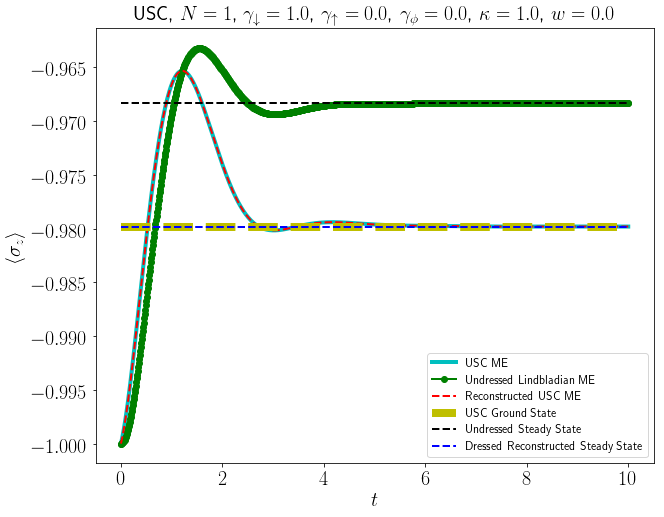

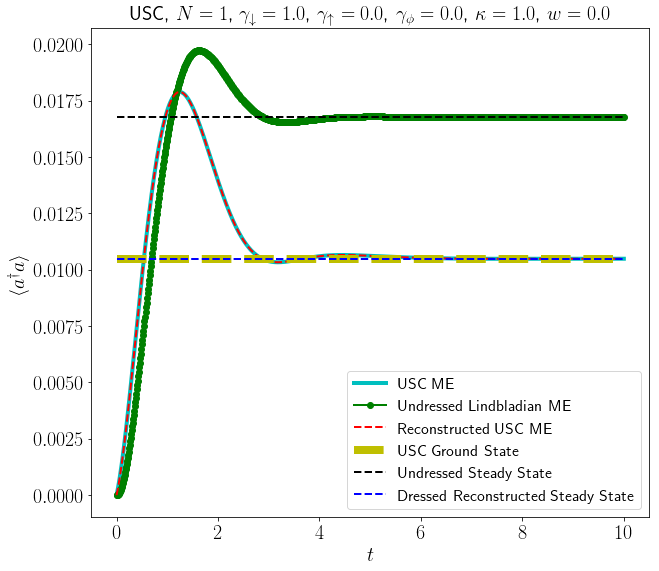

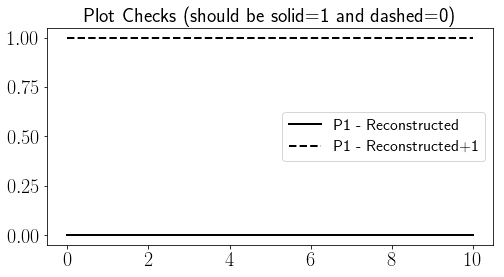

In [83]:
lw = 2
label_size = 20
gamma_string = np.round(gamma,2)
pump_string = np.round(pump,2)
deph_string = np.round(dephasing,2)
kappa_string = np.round(kappa,2)
pumpp_string = np.round(photon_pump,2)

plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)

# Figure 1 -- Spin Inversion
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10, 8))
axes.plot(tlist, szt, 'c', linewidth = 2*lw, label = "USC ME")
axes.plot(tlist, szt2, 'g-o', linewidth = lw, label = "Undressed Lindbladian ME")
axes.plot(tlist, szt3, 'r--', linewidth = lw, label = "Reconstructed USC ME")
axes.plot(tlist, gstate, 'y--', linewidth = 4*lw, label = "USC Ground State")
axes.plot(tlist, undressed_steady_list, 'k--', 
          linewidth = lw, label = "Undressed Steady State")
axes.plot(tlist, steady_reconstructed_list, 'b--', 
          linewidth = lw, label = "Dressed Reconstructed Steady State")

plt.xlabel(r'$t$', fontsize=label_size)
plt.ylabel(r'$\langle \sigma_z\rangle$', fontsize=label_size)
axes.legend(fontsize=label_size*0.6)
plt.title(r'USC, $N={}$, $\gamma_\downarrow={}$, $\gamma_\uparrow={}$, $\gamma_\phi={}$, $\kappa={}$, $w={}$'
          .format(1,gamma_string,pump_string,deph_string,kappa_string,pumpp_string),
          fontsize = label_size)
#fname = 'usc_N=1_gE{}_gP{}.pdf'.format(gamma_string,pump_string)
#plt.savefig(fname)    
plt.show()
plt.close()

# Figure 2 -- Photon population
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10, 9))
axes.plot(tlist, nphott, 'c', linewidth = 2*lw, label = "USC ME")
axes.plot(tlist, nphott2, 'g-o', linewidth = lw, label = "Undressed Lindbladian ME")
axes.plot(tlist, nphott3, 'r--', linewidth = lw, label = "Reconstructed USC ME")
axes.plot(tlist, gstate_phot, 'y--', linewidth = 4*lw, label = "USC Ground State")
axes.plot(tlist, undressed_steady_list_phot, 'k--', 
          linewidth = lw, label = "Undressed Steady State")
axes.plot(tlist, steady_reconstructed_list_phot, 'b--', 
          linewidth = lw, label = "Dressed Reconstructed Steady State")

plt.xlabel(r'$t$', fontsize=label_size)
plt.ylabel(r'$\langle a^\dagger a\rangle$', fontsize=label_size)
axes.legend(fontsize=label_size*0.8)
plt.title(r'USC, $N={}$, $\gamma_\downarrow={}$, $\gamma_\uparrow={}$, $\gamma_\phi={}$, $\kappa={}$, $w={}$'
          .format(1,gamma_string,pump_string,deph_string,kappa_string,pumpp_string),
          fontsize = label_size)
#fname = 'usc_phot_N=1_gE{}_gP{}.pdf'.format(gamma_string,pump_string)
#plt.savefig(fname)    
plt.show()
plt.close()


# Fig 3 checks ==0,1
fig, axes3 = plt.subplots(1, 1, sharex = True, figsize = (8,4))
axes3.plot(tlist, np.real(szt - szt3), 'k-', linewidth=lw, label="P1 - Reconstructed")
axes3.plot(tlist, 1+np.real(szt - szt3), 'k--', linewidth=lw, label="P1 - Reconstructed+1")
plt.title(r'Plot Checks (should be solid=1 and dashed=0)'
          .format(1,gamma_string,pump_string,deph_string,kappa_string,pumpp_string),
          fontsize = label_size)
axes3.legend(fontsize=label_size*0.8)
plt.show()
plt.close()

### 2) Case $N>1$ : Multiple TLSs

#### Define standard parameters and new operators for the tensor space

In [84]:
# N TLS parameters

# N TLSs 
N = 3
ntls = N
nds = num_dicke_states(ntls)
[jx, jy, jz, jp, jm] = j_algebra(N)
w0 = wq

gE = gamma
gD = dephasing
gP = pump

gCE = 0.1
gCD = 0.
gCP = 0.

print("gE= ",gE," gD= ",gD," gP= ",gP," gCE= ",gCE," gCD= ",gCD," gCP= ",gCP)

# spin hamiltonian
h = w0 * jz

#photonic parameters
nphot = Ncav
wc = wcav
kappa = kappa
w_pump = photon_pump
g = 2*lam
a_N = destroy(nphot)

# total operators in tensor space (N TLSs and nphot photons)
jz_tot = tensor(qeye(nphot), jz)
jp_tot = tensor(qeye(nphot), jp)
jm_tot = tensor(qeye(nphot), jm)
jpjm_tot = tensor(qeye(nphot), jp*jm)
nphot_tot = tensor(a_N.dag()*a_N, qeye(nds))
adag_tot = tensor(a_N.dag(), qeye(nds))
a_tot = tensor(a_N, qeye(nds))

gE=  1.0  gD=  0.0  gP=  0.0  gCE=  0.1  gCD=  0.0  gCP=  0.0


### 2.a) Case $N>1$: Undressed basis, non-USC Liouvillian (with PIQS)
We build the light-matter Liouvillian using the undressed basis

In [85]:
# N TLS Liouvillian (undressed basis)
system = Piqs(N = N)
system.hamiltonian = h 
system.emission = gE 
system.dephasing = gD
system.pumping = gP
system.collective_emission = gCE 
system.collective_dephasing = gCD
system.collective_pumping = gCP

# build the total Liouvillian for comparison
liouv = system.liouvillian() 

# build the single non-USC Lindbladians to reconstruct the USC ones
systemE = Piqs(N = N, emission = gE)
systemD = Piqs(N = N, dephasing = gD)
systemP = Piqs(N = N, pumping = gP)
systemCE = Piqs(N = N, collective_emission = gCE)
systemCD = Piqs(N = N, collective_dephasing = gCD)
systemCP = Piqs(N = N, collective_pumping = gCP)

lindbladE = systemE.lindbladian() 
lindbladD = systemD.lindbladian() 
lindbladP = systemP.lindbladian() 
lindbladCE = systemCE.lindbladian() 
lindbladCD = systemCD.lindbladian() 
lindbladCP = systemCP.lindbladian()


# photonic Liouvilian
h_phot = wc*a_N.dag()*a_N
c_ops_phot = [np.sqrt(kappa)*a_N, np.sqrt(w_pump)*a_N.dag()]
liouv_phot = liouvillian(h_phot, c_ops_phot)

# photonic Lindbladian for reconstruction
lindblad_a = liouvillian(0*h_phot, [np.sqrt(kappa)*a_N])
lindblad_adag = liouvillian(0*h_phot, [np.sqrt(w_pump)*a_N.dag()])

# identity superoperators
id_tls = to_super(qeye(nds))
id_phot = to_super(qeye(nphot))

# place the Lindbladians in the tensor Liouvillian space
lindE = super_tensor(id_phot, lindbladE) 
lindD = super_tensor(id_phot, lindbladD) 
lindP = super_tensor(id_phot, lindbladP) 
lindCE = super_tensor(id_phot, lindbladCE) 
lindCD = super_tensor(id_phot, lindbladCD) 
lindCP = super_tensor(id_phot, lindbladCP)
lind_a = super_tensor(lindblad_a, id_tls)
lind_adag = super_tensor(lindblad_adag, id_tls)

# light-matter superoperator and total liouvillian in bare basis
liouv_sum = super_tensor(liouv_phot, id_tls) + super_tensor(id_phot, liouv)
h_int = g * tensor(a_N + a_N.dag(), jx)
liouv_int = -1j* spre(h_int) + 1j* spost(h_int)
liouv_tot = liouv_sum + liouv_int
h_tot = tensor(qeye(nphot), h) + tensor(h_phot, qeye(nds)) + h_int
print("Non-USC Lindbladian built with PIQS")
print("liouv_tot.shape =",liouv_tot.shape)
system

Non-USC Lindbladian built with PIQS
liouv_tot.shape = (324, 324)


N = 3
Hilbert space dim = (6, 6)
Number of Dicke states = 6
Liouvillian space dim = (36, 36)
emission = 1.0
collective_emission = 0.1

### 2.b) Case $N>1$: Dressed basis, reconstructed USC Liouvillian (Dicke basis with PIQS)
We reconstruct the USC Liouvillian from the non-USC Liouvillian built with PIQS in the Dicke basis

In [86]:
# construct USC liouvillian from PIQS
print("Calculating USC eigenstates...")
eigen_value, eigen_state = h_tot.eigenstates()
print("_Calculated USC eigenstates.")
matrixsize_N = nds * nphot
c_ops_true_N = []
print("Calculating USC Lindbladian (from PIQS)...")
# reconstruct USC Lindbladian for local and collective processes (besides dephasing) 
for j in range(matrixsize_N):
    for k in range(j+1, matrixsize_N):
        vec_rhojj_N = op2vec(eigen_state[j] * eigen_state[j].dag())
        vec_rhokk_N = op2vec(eigen_state[k] * eigen_state[k].dag())
        vec_rhojk_N = op2vec(eigen_state[j] * eigen_state[k].dag())
        
        if gE != 0:
            # local emission
            overlap_N = (vec_rhojj_N.dag() * lindE * vec_rhokk_N).data[0,0]
            c_ops_true_N.append(np.sqrt(overlap_N)*eigen_state[j]*eigen_state[k].dag())    
        if gP != 0:
            # local pumping
            overlap_N = (vec_rhojj_N.dag() * lindP * vec_rhokk_N).data[0,0]
            c_ops_true_N.append(np.sqrt(overlap_N)*eigen_state[k]*eigen_state[j].dag())                
        if gCE != 0:
            # collective emission
            overlap_N = (vec_rhojj_N.dag() * lindCE * vec_rhokk_N).data[0,0]
            c_ops_true_N.append(np.sqrt(overlap_N)*eigen_state[j]*eigen_state[k].dag())    
            
        if gCP != 0:
            # collective pumping
            overlap_N = (vec_rhojj_N.dag() * lindCP * vec_rhokk_N).data[0,0]
            c_ops_true_N.append(np.sqrt(overlap_N)*eigen_state[k]*eigen_state[j].dag())                

        if kappa != 0:
            # photon emission
            overlap_N = (vec_rhojj_N.dag() * lind_a * vec_rhokk_N).data[0,0]
            c_ops_true_N.append(np.sqrt(overlap_N)*eigen_state[j]*eigen_state[k].dag())    

        if photon_pump != 0:
            # photon pump
            overlap_N = (vec_rhojj_N.dag() * lind_adag * vec_rhokk_N).data[0,0]
            c_ops_true_N.append(np.sqrt(overlap_N)*eigen_state[k]*eigen_state[j].dag())                

print("_Calculated USC Lindbladian.")       

Calculating USC eigenstates...
_Calculated USC eigenstates.
Calculating USC Lindbladian (from PIQS)...
_Calculated USC Lindbladian.


In [87]:
## Set the intial state in the tensor Hilbert space
# intial spin state
rho0 = dicke(N, N/2, -N/2)
# intial photon state
rho0_phot = ket2dm(basis(nphot,0))
# intial tensor state 
rho0_tot = tensor(rho0_phot, rho0)

## Time integrations
# time integration for non-USC, PIQS
print("Calculating mesolve non-USC (PIQS)...")
output4 = mesolve(liouv_tot, rho0_tot, tlist, [],
                  [jz_tot, jp_tot, adag_tot*a_tot], options=options)
rhot_tot4 = output4.states
jzt_tot4 = output4.expect[0]
jpt_tot4 = output4.expect[1]
nphott_tot4 = output4.expect[2]
print("_Calculated mesolve non-USC (PIQS).")

# time integration for USC reconstructed with PIQS
print("Calculating mesolve USC (from PIQS)...")
output5 = mesolve(h_tot, rho0_tot, tlist, c_ops_true_N,
                  [jz_tot, jp_tot, adag_tot*a_tot], options=options)
rhot_tot5 = output5.states
jzt_tot5 = output5.expect[0]
jpt_tot5 = output5.expect[1]
nphott_tot5 = output5.expect[2]
print("_Calculated mesolve USC (from PIQS).")
gstate_N = [expect(eigen_state[0] * eigen_state[0].dag(), jz_tot/(N/2.0)) for t in tlist]

Calculating mesolve non-USC (PIQS)...
_Calculated mesolve non-USC (PIQS).
Calculating mesolve USC (from PIQS)...
_Calculated mesolve USC (from PIQS).


### 2.c) Case $N>1$: Undressed basis, non-USC Liouvillian ($2^N\cdot2^N$ basis)
We reconstruct the USC Liouvillian from the non-USC Liouvillian built with QuTiP in the uncoupled basis. This procedure is feasible only for very low numbers of TLSs, $N\ll 10$, given that there is a overhead also from the photonic space. 

In [88]:
## N>1 with QuTiP without PIQS (2**N basis, called "2N") 

# implement only if N<N_max
# otherwise it becomes too computationally intensive
N_max = 5

if N<N_max:
    ## Operators
    # define local spin algebra
    sx_2N, sy_2N, sz_2N, sp_2N, sm_2N = spin_algebra(N)
    # define collective spin algebra
    jx_2N, jy_2N, jz_2N, jp_2N, jm_2N = j_algebra(N, basis="uncoupled") 
    # place collective spin operators in total Hilbert space
    jz_tot_2N = tensor(qeye(nphot),jz_2N)
    jp_tot_2N = tensor(qeye(nphot),jp_2N)
    # build spin identity operator with correct dimensions (tensor Hilbert space)
    id_tls_2N = qeye(2**N)
    dims_2N = jz_2N.dims
    id_tls_2N.dims = dims_2N
    # build spin identity superoperator
    sup_tls_2N = to_super(id_tls_2N)
    
    # Spin Hamiltonian in total Hilbert space    
    h0_2N = tensor(qeye(nphot), wq*jz_2N)
    # Photon Hamiltonian in total Hilbert space        
    h_phot_2N = tensor(wcav*a_N.dag()*a_N, id_tls_2N)
    # Spin-Photon Hamiltonian in total Hilbert space        
    hint_2N = g*tensor(a_N.dag()+a_N, jx_2N)
    # Total Hamiltonian         
    h_2N =  h0_2N + h_phot_2N + hint_2N

    # Collapse operators for the Liouvillian        
    cops_tls = c_ops_tls(N = N, emission = gE, pumping = gP, dephasing = gD,
                        collective_emission = gCE, collective_pumping = gCP, 
                         collective_dephasing = gCD)

    cops_gE_2N = c_ops_tls(N = N, emission = gE)
    cops_gP_2N = c_ops_tls(N = N, pumping = gP)
    cops_gD_2N = c_ops_tls(N = N, dephasing = gD)
    cops_gCE_2N = c_ops_tls(N = N, collective_emission = gCE)
    cops_gCD_2N = c_ops_tls(N = N, collective_dephasing = gCD)
    cops_gCP_2N = c_ops_tls(N = N, collective_pumping = gCP)
    cops_2N = []
    
    # Place collapse operators in total tensor space
    for i in range(0,len(cops_tls)):
        cops_2N.append(tensor(qeye(nphot), cops_tls[i]))
    # Build photonic collapse operators and place in total tensor space
    cops_k = np.sqrt(kappa)*a_N
    cops_w = np.sqrt(photon_pump)*a_N.dag()    
    
    cops_k_2N = tensor(np.sqrt(kappa)*a_N, id_tls_2N)
    cops_w_2N = tensor(np.sqrt(photon_pump)*a_N.dag(), id_tls_2N)    
    # Add photonic collapse operators
    cops_2N.append(cops_k_2N)
    cops_2N.append(cops_w_2N)    

    # Finally build the total Liouvillian (non-USC)
    liouv_2N = liouvillian(h_2N, cops_2N)    
    print(liouv_2N.shape)


    # Build Lindbladians for reconstruction of the USC Liouvillian
    lindE_2N = liouvillian(0.*jz_2N, cops_gE_2N)
    lindD_2N = liouvillian(0.*jz_2N, cops_gD_2N)
    lindP_2N = liouvillian(0.*jz_2N, cops_gP_2N)
    lindCE_2N = liouvillian(0.*jz_2N, cops_gCE_2N)
    lindCD_2N = liouvillian(0.*jz_2N, cops_gCD_2N)
    lindCP_2N = liouvillian(0.*jz_2N, cops_gCP_2N)
    lindk_2N = liouvillian(0.*a_N, [cops_k])
    lindw_2N = liouvillian(0.*a_N, [cops_w])
    
    # Place Lindbladians in total Liouvillian space
    lindE_2N = super_tensor(id_phot, lindE_2N)
    lindD_2N = super_tensor(id_phot, lindD_2N)
    lindP_2N = super_tensor(id_phot, lindP_2N)
    lindCE_2N = super_tensor(id_phot, lindCE_2N)
    lindCD_2N = super_tensor(id_phot, lindCD_2N)
    lindCP_2N = super_tensor(id_phot, lindCP_2N)
    lindw_2N = super_tensor(lindw_2N, sup_tls_2N)
    lindk_2N = super_tensor(lindk_2N, sup_tls_2N)

    
    # Set initial state in tensor Hilbert space    
    rho0_tls_2N = ground(N, "uncoupled") 
    rh0_tot_2N = tensor(rho0_phot, rho0_tls_2N)    

(576, 576)


### 2.d) Case $N>1$: Dressed basis, reconstructed USC Liouvillian ($2^N\cdot2^N$ basis)
We reconstruct the USC Liouvillian from the non-USC Liouvillian built with QuTiP in the $2^N\cdot 2^N$ basis

In [89]:
# construct USC liouvillian (QuTiP)
if N<N_max:
    print("Calculating USC eigenstates (QuTiP, 2**N space)...")
    eigen_value_2N, eigen_state_2N = h_2N.eigenstates()
    print("_Calculated USC eigenstates (QuTiP, 2**N space).")
    matrixsize_2N = 2**N * nphot
    c_ops_true_2N = []
    print("Calculating USC Lindbladian (QuTiP, 2**N space)...")
    for j in range(matrixsize_2N):
        for k in range(j+1, matrixsize_2N):

            vec_rhojj_2N = op2vec(eigen_state_2N[j] * eigen_state_2N[j].dag())
            vec_rhokk_2N = op2vec(eigen_state_2N[k] * eigen_state_2N[k].dag())
            vec_rhojk_2N = op2vec(eigen_state_2N[j] * eigen_state_2N[k].dag())
            
            if gE !=0:
                # spin emission contribution to reconstructed USC Liouvillian (2^N Hilbert)
                overlap_2N = (vec_rhojj_2N.dag() * lindE_2N * vec_rhokk_2N).data[0,0]
                c_ops_true_2N.append(np.sqrt(overlap_2N)*eigen_state_2N[j]* \
                                     eigen_state_2N[k].dag())
            if gP !=0:
                # spin pump contribution to reconstructed USC Liouvillian (2^N Hilbert)                
                overlap_2N = (vec_rhojj_2N.dag() * lindP_2N * vec_rhokk_2N).data[0,0]
                c_ops_true_2N.append(np.sqrt(overlap_2N)*eigen_state_2N[k]* \
                                     eigen_state_2N[j].dag())
            if kappa !=0:
                # photon emission contribution to reconstructed USC Liouvillian (2^N Hilbert)                
                overlap_2N = (vec_rhojj_2N.dag() * lindk_2N * vec_rhokk_2N).data[0,0]
                c_ops_true_2N.append(np.sqrt(overlap_2N)*eigen_state_2N[j]* \
                                     eigen_state_2N[k].dag())
            if photon_pump !=0:
                # photon pump contribution to reconstructed USC Liouvillian (2^N Hilbert)
                overlap_2N = (vec_rhojj_2N.dag() * lindw_2N * vec_rhokk_2N).data[0,0]
                c_ops_true_2N.append(np.sqrt(overlap_2N)*eigen_state_2N[k]* \
                                     eigen_state_2N[j].dag())
            if gCE !=0:
                # collective spin emission contribution to reconstructed USC Liouvillian (2^N Hilbert)
                overlap_2N = (vec_rhojj_2N.dag() * lindCE_2N * vec_rhokk_2N).data[0,0]
                c_ops_true_2N.append(np.sqrt(overlap_2N)*eigen_state_2N[j]* \
                                     eigen_state_2N[k].dag())
            if gCP !=0:
                # collective spin pump contribution to reconstructed USC Liouvillian (2^N Hilbert)
                overlap_2N = (vec_rhojj_2N.dag() * lindCP_2N * vec_rhokk_2N).data[0,0]
                c_ops_true_2N.append(np.sqrt(overlap_2N)*eigen_state_2N[k]* \
                                     eigen_state_2N[j].dag())
                
    print("_Calculated USC Lindbladian (QuTiP, 2**N space).")

    # Here we did not include dephasing to reconstruct the USC Liouvillian

Calculating USC eigenstates (QuTiP, 2**N space)...
_Calculated USC eigenstates (QuTiP, 2**N space).
Calculating USC Lindbladian (QuTiP, 2**N space)...
_Calculated USC Lindbladian (QuTiP, 2**N space).


In [90]:
if N<N_max:
    print("Calculating mesolve non-USC (QuTiP, 2**N space)...")
    output6 = mesolve(liouv_2N, rh0_tot_2N, tlist, [], [jz_tot_2N, jp_tot_2N], 
                      options=options)
    rhot_tot6 = output6.states
    jzt_tot6 = output6.expect[0]
    jpt_tot6 = output6.expect[1]
    print("_Calculated mesolve non-USC (QuTiP, 2**N space).")

    print("Calculating mesolve USC (QuTiP, 2**N space)...")
    output7 = mesolve(h_2N, rh0_tot_2N, tlist, c_ops_true_2N, 
                      [jz_tot_2N, jp_tot_2N], options=options)
    rhot_tot7 = output7.states
    jzt_tot7 = output7.expect[0]
    jpt_tot7 = output7.expect[1]
    print("_Calculated mesolve USC (QuTiP, 2**N space).")

Calculating mesolve non-USC (QuTiP, 2**N space)...
_Calculated mesolve non-USC (QuTiP, 2**N space).
Calculating mesolve USC (QuTiP, 2**N space)...
_Calculated mesolve USC (QuTiP, 2**N space).


In [91]:
## One could make a 2.e) point with a non-reconstructed USC Lindbladian, 
## just calculating the collapse operators

In [92]:
# build the ground state calculated from the 2^N light-matter Hamiltonian
if N<N_max:
    gstate_2N = [expect(eigen_state_2N[0] * eigen_state_2N[0].dag(),
                        jz_tot_2N/(N/2.0)) for t in tlist]

#### Visualization: Comparing time evolutions for $N>1$

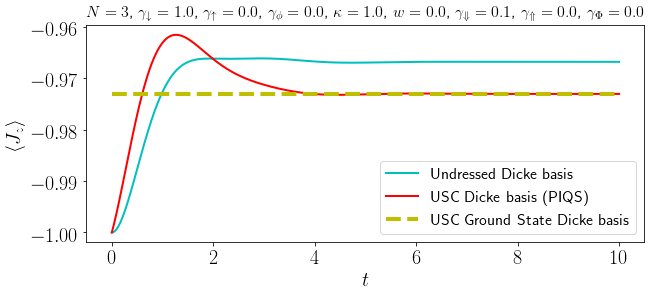

In [102]:
lw = 2
label_size = 20
plt.rc('text', usetex = True)
plt.rc('xtick', labelsize=label_size) 
plt.rc('ytick', labelsize=label_size)
gE_string = np.round(gE,2)
gD_string = np.round(gD,2)
gP_string = np.round(gP,2)
gCE_string = np.round(gCE,2)
gCD_string = np.round(gCD,2)
gCP_string = np.round(gCP,2)
k_string = np.round(kappa,2)
w_string = np.round(photon_pump,2)

fig3, axes3 = plt.subplots(1, 1, sharex=True, figsize = (10, 4))
plt.xlabel(r'$t$', fontsize=label_size)
plt.ylabel(r'$\langle J_z\rangle$', fontsize=label_size)
axes3.plot(tlist, jzt_tot4/(N/2.0), 'c-', linewidth=lw, label="Undressed Dicke basis")
axes3.plot(tlist, jzt_tot5/(N/2.0), 'r-', linewidth=lw, label="USC Dicke basis (PIQS)")
axes3.plot(tlist, gstate_N, 'y--', linewidth=2*lw, label="USC Ground State Dicke basis")
if N==1:
    axes3.plot(tlist, szt, 'b', linewidth=lw, label="P1 USC me")
    axes3.plot(tlist, szt2, 'g-', linewidth=lw, label="P1 lind me")
    axes3.plot(tlist, np.real(szt-jzt_tot5/(N/2.0))-1, 'c-', linewidth=lw, 
               label="-1 + jz(PIQS undressed) - jz(undressed me)")
    axes3.plot(tlist, np.real(szt-jzt_tot5/(N/2.0))-1, 'k--', linewidth=lw, 
               label="-1 + jz(PIQS USC) - jz(P1 USC me)")

axes3.legend(fontsize=label_size*0.8)
plt.title(r'$N={}$, $\gamma_\downarrow={}$, $\gamma_\uparrow={}$, $\gamma_\phi={}$, $\kappa={}$, $w={}$, $\gamma_\Downarrow={}$, $\gamma_\Uparrow={}$, $\gamma_\Phi={}$'
          .format(N,gE_string,gP_string,gD_string,kappa_string,w_string,gCE_string,gCP_string,gCD_string),
          fontsize = label_size*0.8)
plt.show()
plt.close()

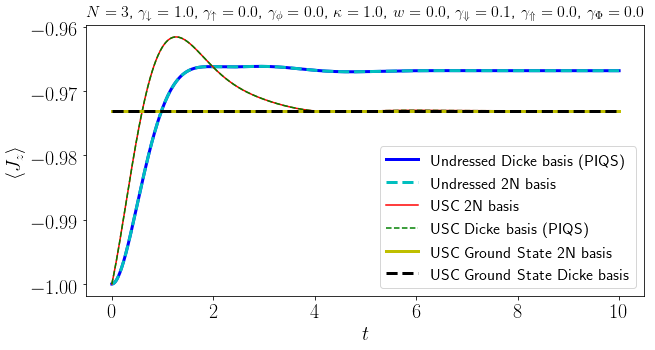

In [100]:
lw = 1.5
fig4, axes4 = plt.subplots(1, 1, sharex=True, figsize = (10, 5))
plt.xlabel(r'$t$', fontsize=label_size)
plt.ylabel(r'$\langle J_z\rangle$', fontsize=label_size)
axes4.plot(tlist, jzt_tot4/(N/2.0), 'b-', linewidth=2*lw, 
           label="Undressed Dicke basis (PIQS)")
if N<N_max:
    axes4.plot(tlist, jzt_tot6/(N/2.0), 'c--', linewidth=2*lw, label="Undressed 2N basis")
    axes4.plot(tlist, jzt_tot7/(N/2.0), 'r-', linewidth=lw, label="USC 2N basis")
axes4.plot(tlist, jzt_tot5/(N/2.0), 'g--', linewidth=lw, label="USC Dicke basis (PIQS)")
if N<N_max:
    axes4.plot(tlist, gstate_2N, 'y-', linewidth=2*lw, label="USC Ground State 2N basis")
axes4.plot(tlist, gstate_N, 'k--', linewidth=2*lw, label="USC Ground State Dicke basis")
#axes4.set_ylim([-1.2, -0.8])
axes4.legend(fontsize=label_size*0.8)
plt.title(r'$N={}$, $\gamma_\downarrow={}$, $\gamma_\uparrow={}$, $\gamma_\phi={}$, $\kappa={}$, $w={}$, $\gamma_\Downarrow={}$, $\gamma_\Uparrow={}$, $\gamma_\Phi={}$'
          .format(N,gE_string,gP_string,gD_string,kappa_string,w_string,gCE_string,gCP_string,gCD_string),
          fontsize = label_size*0.8)
#fname = 'usc_N={}_gE{}_gP{}.pdf'.format(N,gamma_string,pump_string)
#plt.savefig(fname)    
plt.show()
plt.close()

#### References

[1] H.P. Breuer and F. Petruccione, The Theory of Open Quantum System, Oxford University Press (2002)

[2] F. Beaudoin, J.M. Gambetta, and A. Blais, *Phys. Rev. A* **84**, 043832 (2011)
    Dissipation and ultrastrong coupling in circuit QED

[3] P. Strasberg, G. Schaller, N. Lambert, and T. Brandes, *New. J. Phys.* **18**, 073007 (2016)
    Nonequilibrium thermodynamics in the strong coupling 
    and non-Markovian regime based on a reaction coordinate mapping

[4] B.A. Chase and J.M Geremia, *Phys. Rev. A* **78**, 052101 (2010)
    Collective processes of an ensemble of spin-1/2 particles

[5] N. Shammah, S. Ahmed, N. Lambert, S. De Liberato, and F. Nori, *to be submitted*

[6] J.R. Johansson, P.D. Nation, and F. Nori, *Comp. Phys. Comm.* **183**, 1760 (2012) http://qutip.org

In [ ]:
qutip.about()

In [ ]:
aa = [2, 3]
a2 = [4, 6]
a2.append(aa)
print(a2)